### 신경망 모델 훈련

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import keras
import tensorflow as tf

keras.utils.set_random_seed(42)
tf.random.set_seed(42)
tf.config.experimental.enable_op_determinism()

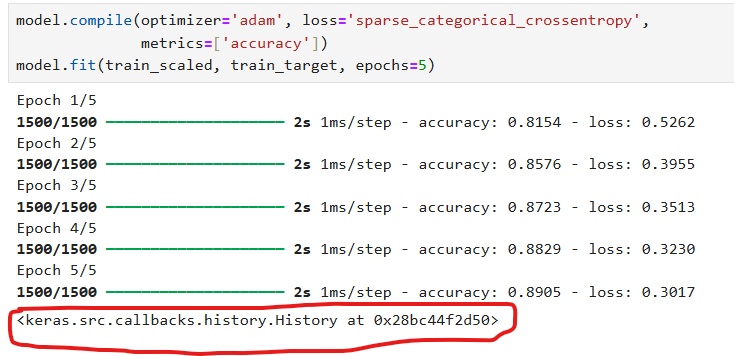

In [2]:
# fit() 메서드로 모델을 훈련하면 훈련 과정이 상세하게 출력되어 확인할 수 있다.
# 여기에는 에포크 횟수, 손실, 정확도 등이 있다. 
# 아래 그림처럼 객체 반환값을 출력한다. => History 객체 반환
#  History 객체 : 손실과 정화도 값이 저장되어 있다.
from IPython.display import Image, display
display(Image(filename="data/img19.png", width=600, height=400))

### 손실 곡선

In [3]:
import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [4]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(28,28)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [5]:
# 모델을 만드는 함수( model function )
# 모델 구조를 정의하고 반환하는 사용자 정의 함수입니다.
# 즉, “모델을 만드는 코드”를 하나의 함수로 묶어놓은 거예요.
model = model_fn()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape               ┃        Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                   │ (None, 784)                │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense (Dense)                       │ (None, 100)                │         78,500 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense_1 (Dense)                     │ (None, 10)                 │          1,010 │
└─────────────────────────────────────┴────────────────────────────┴────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [7]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


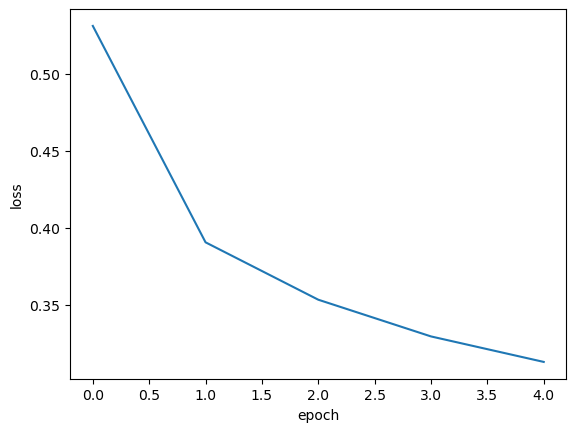

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

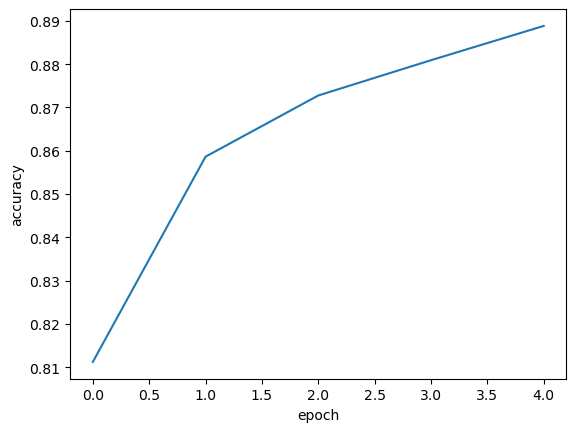

In [9]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [10]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

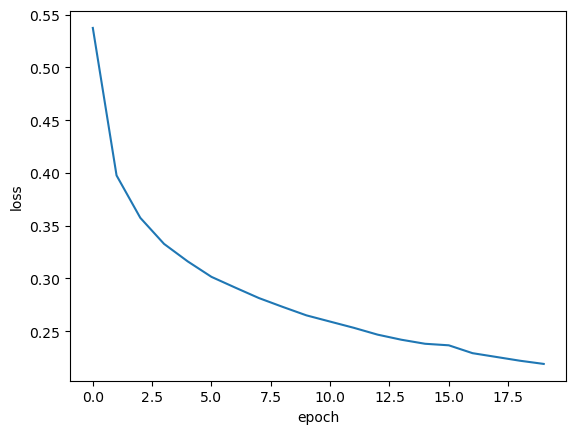

In [11]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 확률적 경사하강법을 사용했을 때 과적합과 에포크의 관계
>- 경사하강법은 손실을 점점 줄이면서 최저점을 찾아갑니다.
>- 초반(1~5 epoch): 손실이 빠르게 줄어듦 → 학습 중
>- 중반(6~15 epoch): 훈련 손실은 계속 줄지만 검증 손실은 줄지 않음 → 과적합 시작
>- 후반(15 epoch 이후): 검증 손실이 오히려 증가 → 완전히 과적합

#### 왜 과적합이 생길까?
>- 경사하강법은 손실을 최대한 줄이는 방향으로 계속 이동합니다.
>- 그런데 에포크를 너무 많이 반복하면 모델이 점점 더 훈련 데이터에만 특화되어갑니다.

#### 과적합을 방지하는 방법
>- EarlyStopping	   :         검증 손실이 더 이상 줄지 않으면 학습 중단<br>
>- Dropout	       :            일부 뉴런 무작위 비활성화 (일반화 향상)<br>
>- Regularization   :         (L2 등)	가중치가 너무 커지지 않게 패널티 추가<br>
>- 적절한 epoch 수 선택	:      훈련/검증 그래프를 보고 중간에 멈추기<br>
>- 적응적 학습률 (Adam 등) :	  불필요하게 오버핏되지 않도록 안정적 업데이트<br>

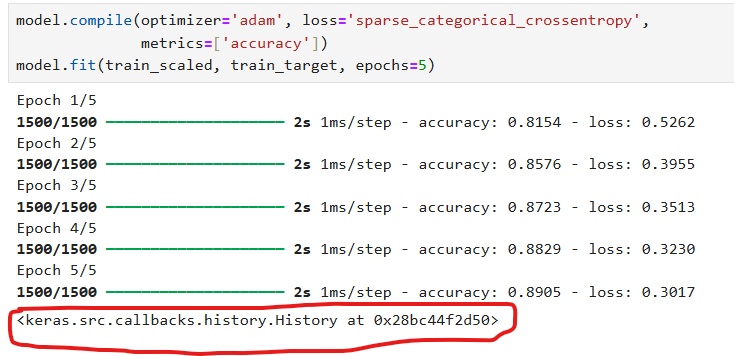

In [12]:
display(Image(filename="data/img19.png", width=600, height=400))

### 검증 손실

In [13]:
# 모델 학습 과정(history) 을 얻고,
# 그 안의 훈련·검증 손실과 정확도 기록을 확인하는 부분

# 사용자가 정의한 model_fn() 함수를 호출
model = model_fn()

# loss='sparse_categorical_crossentropy'  다중 분류 문제에서 사용하는 손실함수 (라벨이 정수형일 때 사용)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 실제 학습(Training) 을 수행하는 부분
# epochs=20 ->  20번 반복 학습
# verbose=0 -> 학습 로그를 숨김 (출력 안 함)
# validation_data=(val_scaled, val_target) : 매 에포크마다 검증(validation) 데이터로 평가
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [14]:
print(history.history.keys())

# 훈련 데이터의 정확도,훈련 데이터의 손실값,검증 데이터의 정확도,검증 데이터의 손실값
# 결과 : dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


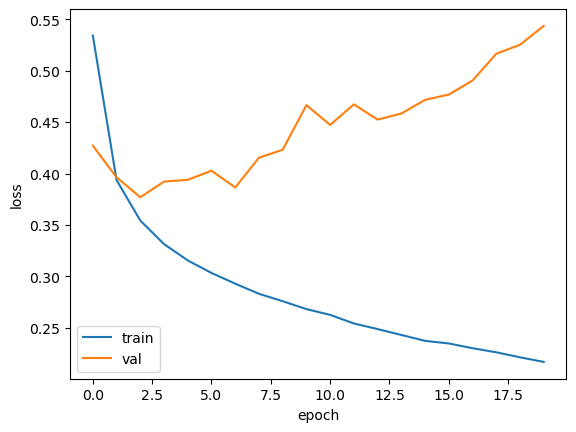

In [15]:
# 훈련 손실(train loss)”과 검증 손실(val loss)”의 변화를 에포크(epoch)별로 나타낸 그래프
# “모델이 학습하면서 얼마나 잘(또는 나쁘게) 되어가는지”를 보여주는 대표적인 학습 곡선(Learning Curve)
# 이 그래프는 훈련 손실은 계속 감소하지만 검증 손실은 증가하는 전형적인 “과적합(overfitting)” 패턴이에요.
# val_loss가 최소가 되는 지점에서 학습을 멈추는 게 가장 좋은 시점입니다
# 그래프상 약 epoch 2~3 지점 (즉, 2.5 근처) 에서 검증 손실(val loss) 이 가장 낮아지고 이후 다시 올라가므로, 그 시점에서 학습을 멈추는 게 맞습니다.
# 훈련 손실은 계속 줄더라도, 검증 손실이 올라가기 시작하면
#  → 모델이 훈련 데이터만 외우고 일반화 성능은 나빠지는 중입니다.
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
# Adam 옵티마이저로 학습했을 때의 손실 곡선 변화
# 과적합은 약하게 발생했지만 전반적으로 안정적인 학습 곡선입니다
# 이번 그래프는 Adam 옵티마이저 덕분에 손실이 더 안정적이고 과적합이 늦게 나타난 경우입니다.
# 최적 학습 시점은 약 4~5 epoch 정도이며, 그 이후엔 약한 과적합이 시작된다고 볼 수 있습니다
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

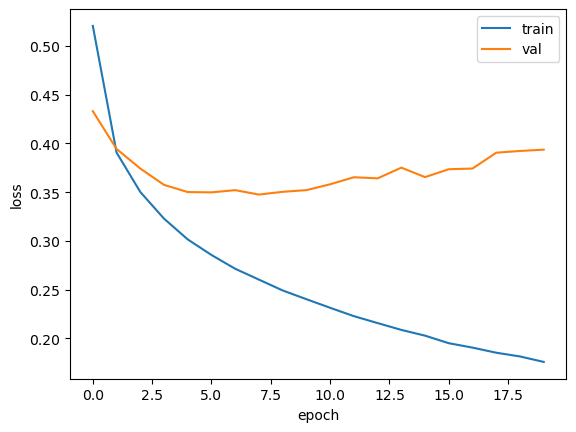

In [17]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

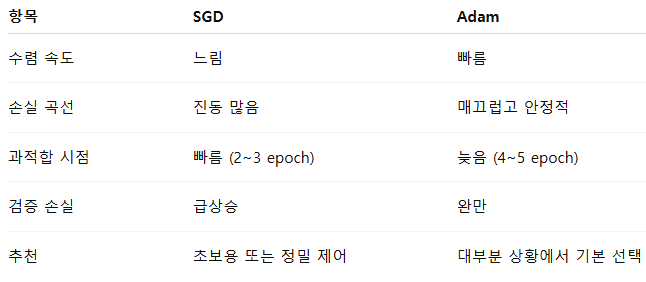

In [18]:
display(Image(filename="data/img21.png", width=600, height=400))

### 드롭아웃
>- 딥러닝에서 **과적합을 막는 가장 유명한 기법 중 하나**
>- 학습 중에 신경망의 일부 뉴런(노드)을 무작위로 꺼서(0으로 만들어서) 학습시키는 방법
>- 매 학습 단계마다 **일부 뉴런**을 **일시적으로 비활성화(drop)** 시켜서 <br>
   모델이 특정 뉴런에 과도하게 의존하지 않도록 하는 **정규화(regularization) 기법**

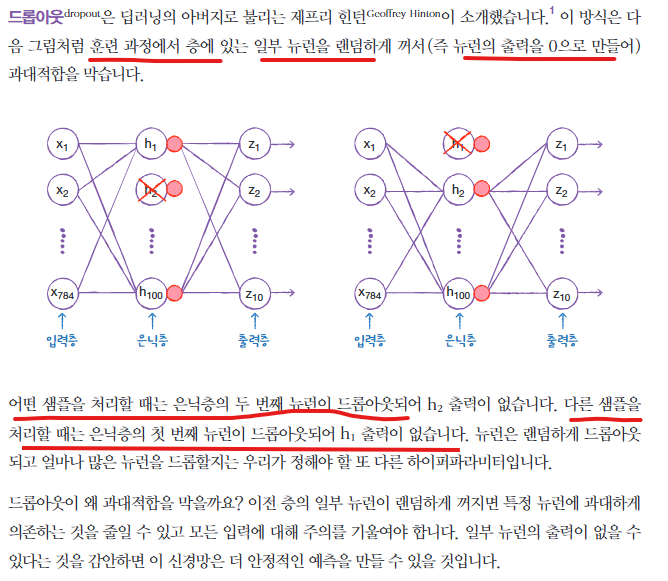

In [19]:
display(Image(filename="data/img22.png", width=600, height=400))

In [20]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
# Dense(100) 이후에 Dropout(0.3)을 넣은 것은 “은닉층 뉴런 중 약 30%를 무작위로 끄겠다”는 뜻입니다
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape               ┃        Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                 │ (None, 784)                │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense_8 (Dense)                     │ (None, 100)                │         78,500 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dropout (Dropout)                   │ (None, 100)                │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense_9 (Dense)                     │ (None, 10)                 │          1,010 │
└─────────────────────────────────────┴────────────────────────────┴────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Dense(100) 이후에 Dropout(0.3)을 넣은 것은 “은닉층 뉴런 중 약 30%를 무작위로 끄겠다”는 뜻입니다
# 위 것과 같은 코딩 (사용자 함수 사용)
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape               ┃        Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                 │ (None, 784)                │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense_10 (Dense)                    │ (None, 100)                │         78,500 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dropout_1 (Dropout)                 │ (None, 100)                │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense_11 (Dense)                    │ (None, 10)                 │          1,010 │
└─────────────────────────────────────┴────────────────────────────┴────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

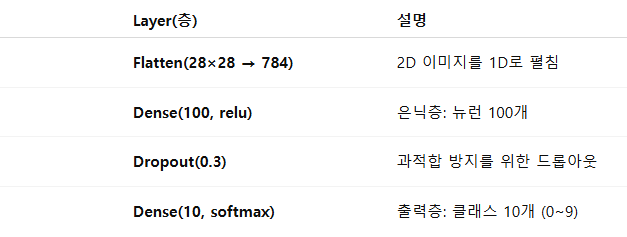

In [23]:
display(Image(filename="data/img23.png", width=600, height=400))
# 입력 784개 × 뉴런 100개 + 편향 100개 → 784×100 + 100 = 78,500
# 은닉층의 일부 뉴런(예: 30%)을 무작위로 꺼서 과적합 방지. 학습 파라미터 없음.
# 100개 입력 × 10개 출력 + 편향 10개 → 100×10 + 10 = 1,010

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

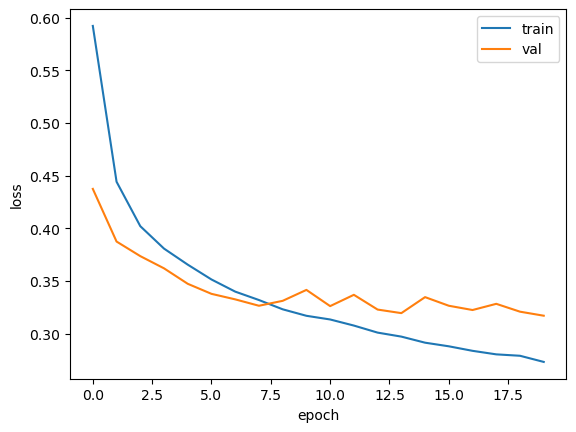

In [25]:
# 이 그래프는 **훈련 손실과 검증 손실이 함께 줄어들며 안정적으로 수렴하는 “이상적인 학습 패턴”**입니다.
# 과적합 없이, 모델이 잘 일반화되고 있다는 증거
# Dropout(또는 Adam의 안정성) 덕분에 훈련·검증 곡선 간의 간격이 매우 좁고, 손실이 동시에 감소하는 이상적인 형태
# 겹치는 부분은 모델이 가장 이상적으로 학습된 구간
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

### 그래프 기본 구조
>- 파란색(train loss): 훈련 데이터의 오차
>- 주황색(val loss): 검증 데이터의 오차
>- x축 = 학습 반복 횟수(epoch)
>- y축 = 손실값(loss), 낮을수록 모델이 예측을 잘한다는 의미
>- 7~8 epoch 부근이 훈련과 검증이 가장 비슷한 균형 구간,
>- 9~10 epoch 부근이 검증 손실이 가장 낮은 최적 시점,
>- 10 이후는 과대적합(훈련은 계속 좋아지지만 검증은 개선되지 않음) 이 시작됩니다.

### 에포크 확인 
>- 교차점 = 최적 에포크는 아닙니다.
>- 최적 에포크는 검증 손실(val_loss)이 최소인 시점
>- 여기서는 11을 최적 에포크라고 하자 ( 랜덤으로 만들기 때문 다를 수 있다)

### 모델 저장과 복원 

In [26]:
# model_fn() : 미리 정의해둔 모델을 생성하는 함수
# keras.layers.Dropout(0.3) 은 드롭아웃 층을 삽입하겠다는 의미
# 드롭아웃(Dropout(0.3)) → 훈련 시 30%
model = model_fn(keras.layers.Dropout(0.3))

# 모델 학습 설정 단계
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습 함수( 11을 최적 에포크)
history = model.fit(train_scaled, train_target, epochs=11, verbose=0,
                    validation_data=(val_scaled, val_target))

In [27]:
# 모델 전체 저장 (Recommended 방식)
# 나중에 이렇게 불러올 수 있습니다:
# from keras.models import load_model
# model = load_model('model-whole.keras')
model.save('model-whole.keras')

In [28]:
# → 가중치(weight)만 저장합니다.
# 모델의 구조나 설정은 저장되지 않아요.
# 나중에 같은 구조의 모델을 다시 만든 뒤 불러와야 합니다:
# model = model_fn(keras.layers.Dropout(0.3))
# model.load_weights('model.weights.h5')
model.save_weights('model.weights.h5')

In [29]:
# 현재 작업 디렉토리 안의 “model”로 시작하는 파일 목록을 자세히(ls -al) 확인하는 리눅스 명령
#ls -al model*

In [30]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5')

In [31]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
# 검증 데이터 중 87.7%를 올바르게 분류했다는 뜻
print(np.mean(val_labels == val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step
0.877


In [32]:
# 위에서 model.save()와 대칭 됨
model = keras.models.load_model('model-whole.keras')
model.evaluate(val_scaled, val_target)
# 375/375: 평가 데이터가 375개 배치로 나누어 처리됨
# loss: 0.33   검증 손실값 (낮을수록 좋음)
# accuracy: 0.877   검증 정확도 (87.7%)
# 375/375 ━━━━━━━ 1s 1ms/step - accuracy: 0.8770 - loss: 0.3334  
# [0.3334382176399231, 0.8769999742507935]

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8770 - loss: 0.3334    


[0.3334382176399231, 0.8769999742507935]

### 콜백

In [33]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [34]:
model = keras.models.load_model('best-model.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - accuracy: 0.8856 - loss: 0.3200  


[0.31998834013938904, 0.8855833411216736]

In [35]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [36]:
print(early_stopping_cb.stopped_epoch)

11


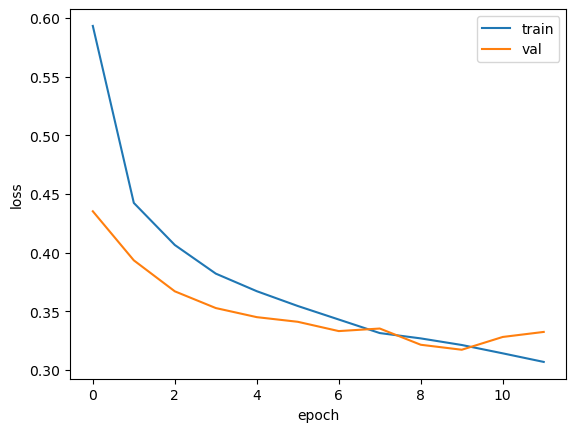

In [37]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [38]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8857 - loss: 0.3173  


[0.31731846928596497, 0.8856666684150696]